# MLPRegressor

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

D:\Anaconda\envs\experiments\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\experiments\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\experiments\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


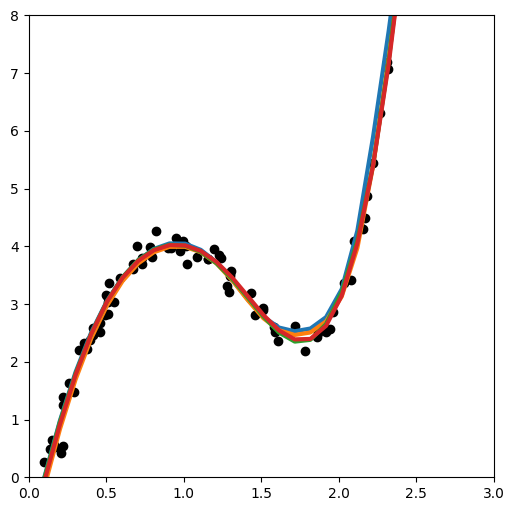

In [4]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))
MLPs = [
    MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=1000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam'),
    MLPRegressor(hidden_layer_sizes=(64, 32, 10), activation='tanh', max_iter=1000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam'),
    MLPRegressor(hidden_layer_sizes=(32, 16, 8), activation='tanh', max_iter=1000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam'),
    MLPRegressor(hidden_layer_sizes=(16, 16, 16), activation='tanh', max_iter=1000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
]
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
for MLP in MLPs:
    y_rbf = MLP.fit(x,y)
    plt.plot(x_plot, MLP.predict(x_plot), linewidth=3)

# Plot outputs




plt.show()



In [5]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.9988037743399019

# Zad. 
Wykonaj walidecję krzyżową.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline( [ ('scaler', StandardScaler()),('classifier', MLPRegressor(max_iter=4000, batch_size=20,solver='adam') )])

param_grid = {
            'classifier__hidden_layer_sizes': [(100, 50, 10), (32, 16, 8)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)
print("Najlepsze parametry:")
print(grid_search.best_params_)

print("Najlepszy wynik (neg MSE):")
print(grid_search.best_score_)

Najlepsze parametry:
{'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (100, 50, 10)}
Najlepszy wynik (neg MSE):
-0.09357276510268916


# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor
najperw rzeba znalezc i pobrac Advertising.csv dataset 

In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/chandanverma07/DataSets/master/Advertising.csv"
df_adv = pd.read_csv(url, index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
pipe = Pipeline( [ ('scaler', StandardScaler()),('classifier', MLPRegressor(max_iter=4000, batch_size=20,solver='adam')),])

param_grid = {
            'classifier__hidden_layer_sizes': [(100, 50, 10), (32, 16, 8)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Najlepsze parametry:")
print(grid_search.best_params_)

print("Najlepszy wynik (neg MSE):")
print(grid_search.best_score_)

Najlepsze parametry:
{'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (32, 16, 8)}
Najlepszy wynik (neg MSE):
-0.31718096675532953


In [10]:
from sklearn import  metrics
metrics.r2_score(y_true= y, y_pred= grid_search.best_estimator_.predict(X))

0.9953380288217029